### Import necessary libraries

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import seaborn as sns # For creating attractive and informative statistical graphics
import matplotlib.pyplot as plt  # For creating plots and visualizations

In [2]:
# Use the 'pd.read_csv()' function to read the "spam.csv" file into a DataFrame
# - "spam.csv": The name of the CSV file you want to read.
# - encoding="latin": Specifies the character encoding of the file (useful for handling non-ASCII characters).
df = pd.read_csv("spam.csv",encoding="latin")

In [3]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Get the dimensions (number of rows and columns) of the DataFrame 'df'.
df.shape

(5572, 5)

### Data Cleaning

In [5]:
# Display summary information about the DataFrame 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Remove the specified columns "Unnamed: 2," "Unnamed: 3," and "Unnamed: 4" from the DataFrame 'df'.
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [7]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename the "v1" column to "target" and the "v2" column to "message" in the DataFrame 'df'.
df.rename(columns={"v1":"target","v2":"message"},inplace=True)

In [9]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
le = LabelEncoder()

# Use the LabelEncoder to encode the "target" column in the DataFrame 'df'
df["target"] = le.fit_transform(df["target"])

In [11]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check for missing values in each column of the DataFrame 'df' and count the number of missing values.
df.isna().sum()

target     0
message    0
dtype: int64

In [13]:
# Check for duplicated rows in the DataFrame 'df' and count the number of duplicated rows.
df.duplicated().sum()

403

In [14]:
# Remove duplicated rows from the DataFrame 'df' while keeping the first occurrence of each duplicated row.
df.drop_duplicates(keep="first",inplace=True)

In [15]:
# Check for duplicated rows in the DataFrame 'df' and count the number of duplicated rows.
df.duplicated().sum()

0

In [16]:
# Get the dimensions (number of rows and columns) of the DataFrame 'df' after removing duplicated rows.
df.shape

(5169, 2)

### Exploratory Data Analysis

In [17]:
# Count the occurrences of each unique value in the "target" column of the DataFrame 'df'.
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

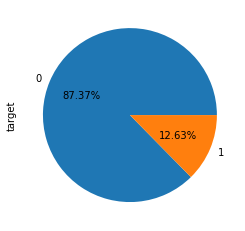

In [18]:
# Create a pie chart to visualize the distribution of values in the "target" column.
df["target"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [19]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Add a new column "num_characters" to the DataFrame 'df' to store the length of each text message.
# The lambda function calculates the length (number of characters) of each message in the "message" column.
df["num_characters"] = df["message"].apply(lambda x:len(x))

In [21]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# Add a new column "num_words" to the DataFrame 'df' to store the number of words in each text message.
# The lambda function tokenizes each message and calculates the number of words.
df["num_words"] = df["message"].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# Add a new column "num_sentences" to the DataFrame 'df' to store the number of sentences in each text message.
# The lambda function tokenizes each message into sentences and calculates the count of sentences.
df["num_sentences"] = df["message"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
# Display the first few rows of the DataFrame 'df' to inspect the data's structure and content.
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
# Generate summary statistics for the numeric columns in the DataFrame 'df.'
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
# Generate summary statistics for the rows in the DataFrame 'df' where the "target" column is equal to 0 (ham messages).
df[df["target"] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123339,1.815545
std,0.0,56.358207,13.491315,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
# Generate summary statistics for the rows in the DataFrame 'df' where the "target" column is equal to 1 (spam messages).
df[df["target"] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.969372
std,0.0,30.137753,7.008418,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

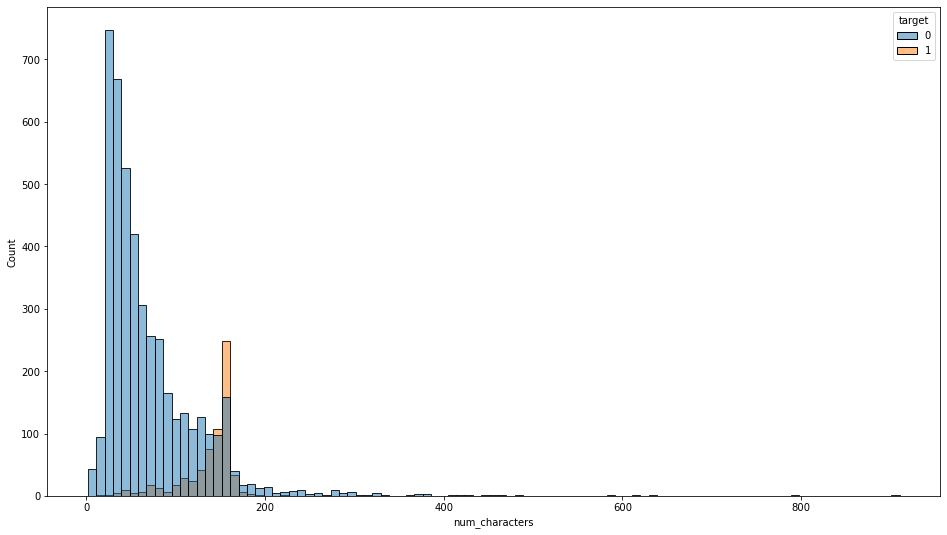

In [29]:
# Create a histogram to visualize the distribution of the "num_characters" column in the DataFrame 'df'.
# - x="num_characters": Specifies the column to be plotted on the x-axis (number of characters).
# - data=df: Specifies the DataFrame containing the data.
# - hue="target": Uses the "target" column to distinguish between "ham" and "spam" messages with different colors.
plt.figure(figsize=(16,9))
sns.histplot(x="num_characters",data=df,hue="target")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

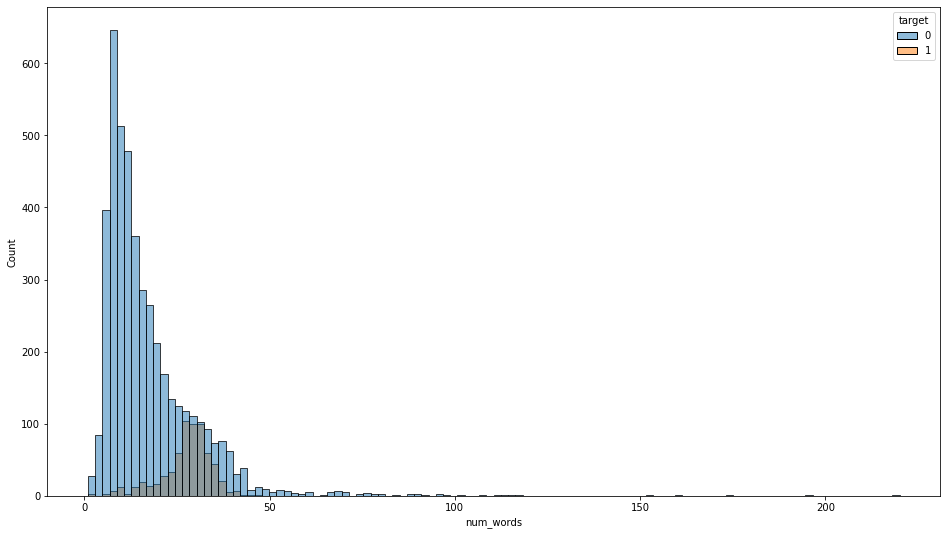

In [30]:
# Create a histogram to visualize the distribution of the "num_words" column in the DataFrame 'df'.
# - x="num_words": Specifies the column to be plotted on the x-axis (number of words).
# - data=df: Specifies the DataFrame containing the data.
# - hue="target": Uses the "target" column to distinguish between "ham" and "spam" messages with different colors.
plt.figure(figsize=(16,9))
sns.histplot(x="num_words",data=df,hue="target")

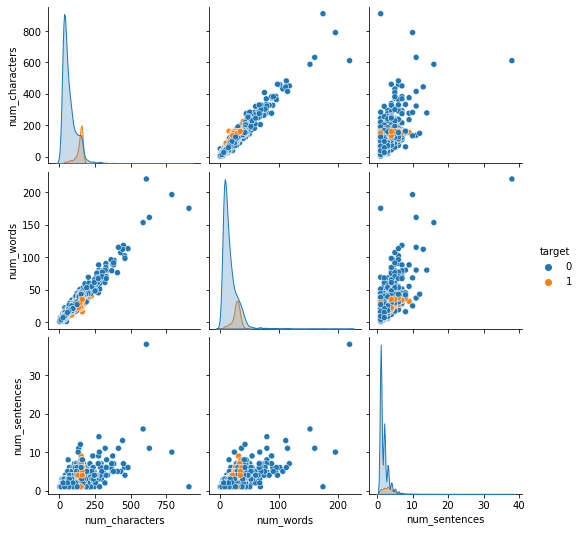

In [31]:
# Create a pairplot to visualize pairwise relationships between numeric columns in the DataFrame 'df'.
# - df: Specifies the DataFrame containing the data.
# - hue="target": Uses the "target" column to distinguish between "ham" and "spam" messages with different colors.
sns.pairplot(df,hue="target")

<AxesSubplot:>

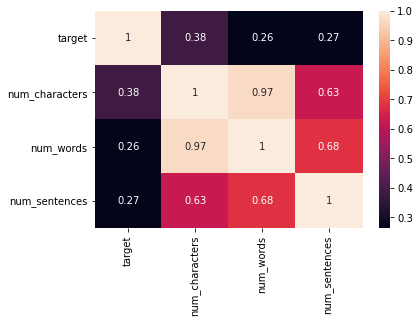

In [32]:
# Create a correlation heatmap to visualize the pairwise correlations between numeric columns in the DataFrame 'df'.
# - df.corr(): Calculates the correlation matrix for numeric columns.
# - annot=True: Displays the correlation values within the heatmap.
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

In [33]:
# NLTK module for stopwords
from nltk.corpus import stopwords
# Python's built-in module for string operations
import string

In [34]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# Import the PorterStemmer class from NLTK's stem module.
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer class.
stemmer = PorterStemmer()

In [ ]:
def preprocess_data(text):

  # lowercase
  text = text.lower()
  # word tokenization
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y.copy()
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y.copy()
  y.clear()

  for i in text:
    y.append(stemmer.stem(i))

  return " ".join(y)



In [ ]:
df["transformed_text"] = df["message"].apply(preprocess_data)

In [ ]:
df.head()

,target,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
spam = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

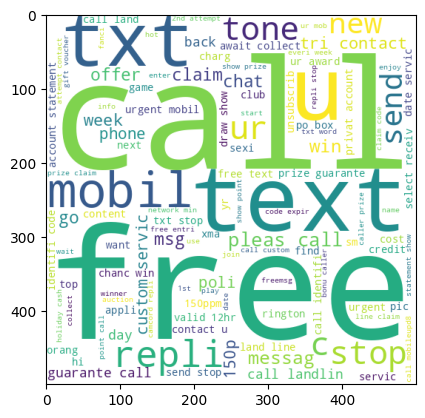

In [ ]:
plt.imshow(spam)

In [ ]:
ham = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

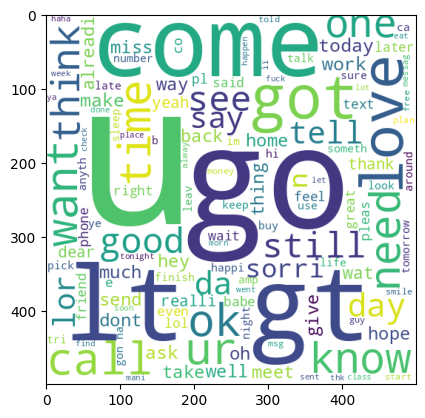

In [ ]:
plt.imshow(ham)

In [ ]:
df.head()

,target,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []

for msg in df[df["target"] == 1]["transformed_text"].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter

In [ ]:
data = pd.DataFrame(Counter(spam_corpus).most_common(30))
data

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<Axes: xlabel='0', ylabel='1'>

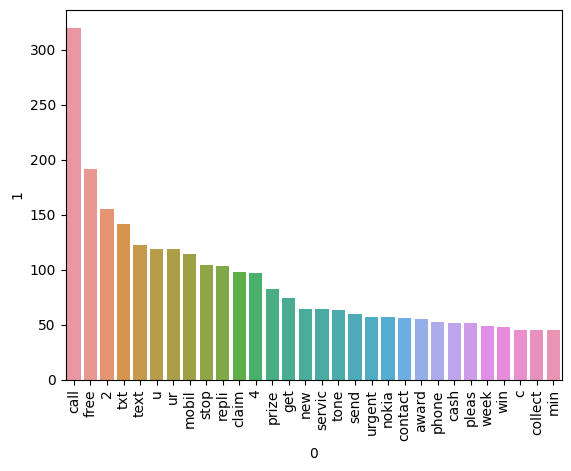

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=0,y=1,data=data)

In [ ]:
ham_corpus = []

for msg in df[df["target"] == 0]["transformed_text"].to_list():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30))
data

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<Axes: xlabel='0', ylabel='1'>

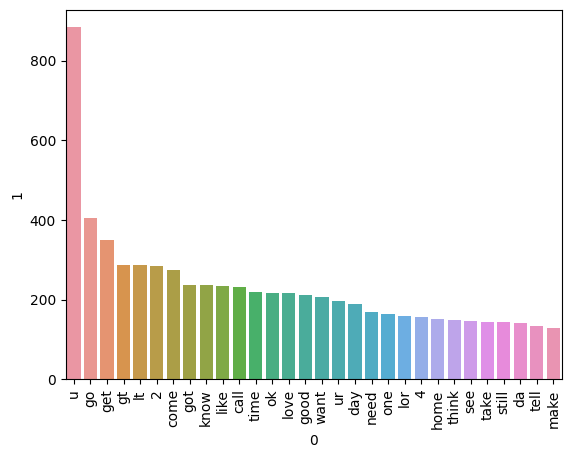

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=0,y=1,data=data)

### Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X= tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = df["target"].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[[793 103]
 [ 25 113]]
0.8762088974854932
0.5231481481481481


In [ ]:
y_pred2 = bnb.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

[[893   3]
 [ 28 110]]
0.9700193423597679
0.9734513274336283


In [ ]:
y_pred3 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

[[896   0]
 [ 42  96]]
0.9593810444874274
1.0


### TFIDF with mnb

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()
dc = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators=50)
ada = AdaBoostClassifier(n_estimators=50)
bc = BaggingClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)
gb = GradientBoostingClassifier(n_estimators=50)
xgb = XGBClassifier(n_estimators=50)

In [ ]:
clf = {
    "SVC":svc,
    "knn":knn,
    "lg":lg,
    "dc":dc,
    "rf":rf,
    "ada":ada,
    "bc":bc,
    "et":et,
    "gb":gb,
    "xgb":xgb
}

In [ ]:
def train_classifier(clf):
  clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc)

(0.9661508704061895, 0.9813084112149533)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clf.items():
  accuracy,precision = train_classifier(clf)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)

In [ ]:
pd.DataFrame({"algorithm":clf.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values(by="Precision",ascending=False)

,algorithm,Accuracy,Precision
1,knn,0.900387,1.000000
2,lg,0.946809,0.988235
4,rf,0.974855,0.982759
0,SVC,0.966151,0.981308
7,et,0.972921,0.974138
5,ada,0.962282,0.954128
9,xgb,0.970019,0.934959
8,gb,0.951644,0.923077
6,bc,0.960348,0.870229
3,dc,0.950677,0.832061


### Model Improve

In [ ]:
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))